# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [1]:
# import relevant packages
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings('ignore') 

In [2]:
# import csv into df and standardise column names
data = pd.read_csv("marketing_customer_analysis.csv")
data.columns = data.columns.str.lower().str.replace(' ','_')



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [5]:
# create numerical df
numerical = data.select_dtypes(include=np.number)
numerical.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
#there are many rows in the income column with 0 income, makes sense to delete them to see if the distribution is normal
income_filtered = numerical[numerical['income'] == 0]
income_filtered
# drop the rows where income = 0 and reset index
numerical.drop(numerical[numerical['income'] == 0].index, inplace = True)
numerical = numerical.reset_index(drop=True)

In [10]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,12887.431650,48767,108,18,38,0,2,566.472247
2,2813.692575,43836,73,12,44,0,1,138.130879
3,8256.297800,62902,69,14,94,0,2,159.383042
4,5380.898636,55350,67,0,13,0,9,321.600000
...,...,...,...,...,...,...,...,...
6812,5032.165498,66367,64,6,48,0,3,307.200000
6813,4100.398533,47761,104,16,58,0,1,541.282007
6814,23405.987980,71941,73,18,89,0,2,198.234764
6815,3096.511217,21604,79,14,28,0,1,379.200000


In [11]:
# create categorical df
categoricals = data.select_dtypes(include=np.object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


In [12]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6817.0,8130.229340,6949.067972,2119.894333,4090.750678,5810.630529,9075.768214,83325.381190
income,6817.0,50456.580461,24305.956566,10037.000000,28432.000000,48081.000000,70187.000000,99981.000000
monthly_premium_auto,6817.0,92.963034,34.615160,61.000000,68.000000,83.000000,109.000000,297.000000
months_since_last_claim,6817.0,15.046941,10.064762,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,6817.0,47.832624,27.895350,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,6817.0,0.381840,0.905048,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,6817.0,2.951005,2.390613,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,6817.0,377.840789,252.648952,0.099007,210.100003,340.800000,498.612632,2893.239678


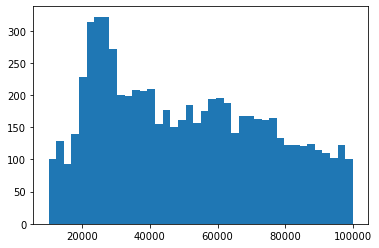

In [13]:
#income distribution with 0 income rows dropped
plt.hist(numerical['income'], bins=40)
plt.show()

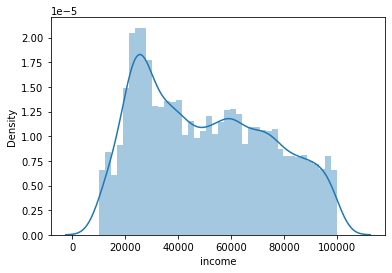

In [14]:
sns.distplot(numerical['income'], bins=40)
plt.show()

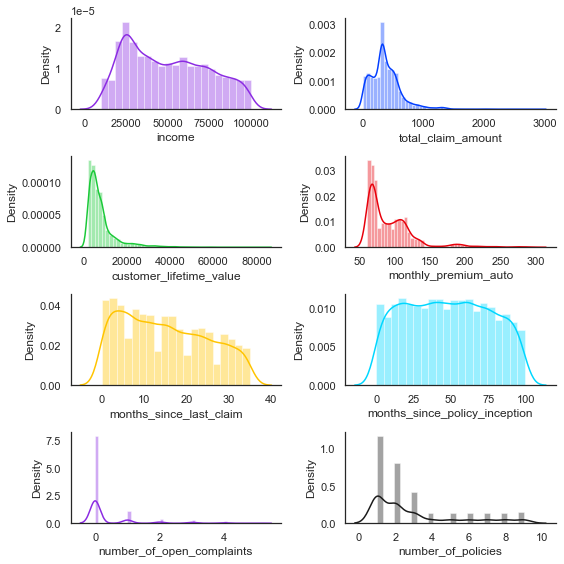

In [15]:
#seaborn dist plot of all numerical columns

sns.set(style="white", palette="bright", color_codes=True)

f, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=False)
sns.despine(left=False)


sns.distplot(numerical["income"], color="m", ax=axes[0, 0])

sns.distplot(numerical["total_claim_amount"], color="b", ax=axes[0, 1])

sns.distplot(numerical["customer_lifetime_value"], color="g", ax=axes[1, 0])

sns.distplot(numerical["monthly_premium_auto"], color="r", ax=axes[1, 1])

sns.distplot(numerical["months_since_last_claim"], color="y", ax=axes[2,0])

sns.distplot(numerical["months_since_policy_inception"],  color="c", ax=axes[2,1])

sns.distplot(numerical["number_of_open_complaints"], color="m", ax=axes[3,0])

sns.distplot(numerical["number_of_policies"], color="k", ax=axes[3,1])


plt.tight_layout()

In [ ]:
# no normal distributions as far as I can see.
# income is closest to normal?

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [18]:
import statsmodels.api as sm

In [25]:
X = numerical.drop(['total_claim_amount',], axis=1)
y = numerical['total_claim_amount']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     798.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:27:09   Log-Likelihood:                -45342.
No. Observations:                6817   AIC:                         9.070e+04
Df Residuals:                    6809   BIC:                         9.075e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# R2 value 0.45 - not a great model
# P-value of income and monthly premium auto is 0 so seems to be statistically relevant to total claim amount


### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [20]:
# correlation matrix
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.002915,0.399491,0.018531,0.011275,-0.025038,0.022683,0.245464
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324,-0.221879
monthly_premium_auto,0.399491,-0.012372,1.000000,0.005887,0.020112,-0.006476,-0.026795,0.636084
months_since_last_claim,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.007744,0.017022,0.001460
months_since_policy_inception,0.011275,0.015799,0.020112,-0.039993,1.000000,0.005763,-0.020548,-0.003733
number_of_open_complaints,-0.025038,0.016642,-0.006476,0.007744,0.005763,1.000000,0.010004,-0.011664
number_of_policies,0.022683,-0.001324,-0.026795,0.017022,-0.020548,0.010004,1.000000,-0.012253
total_claim_amount,0.245464,-0.221879,0.636084,0.001460,-0.003733,-0.011664,-0.012253,1.000000


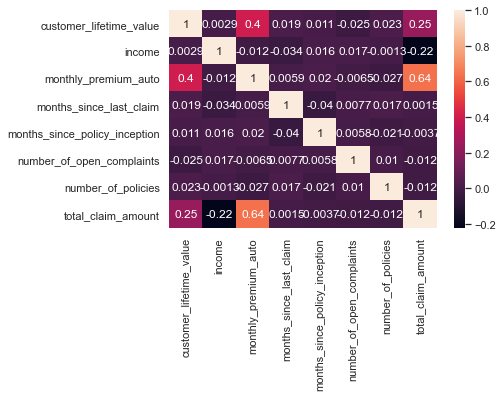

In [21]:
# heatmap of correlations
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('heatmap.png', dpi=400)
plt.show()

In [ ]:
# we don't have any high correlations over 0.9

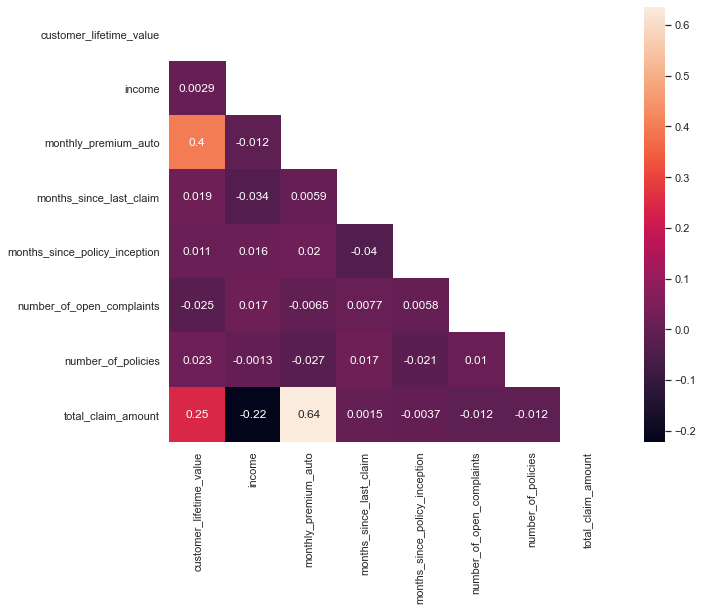

In [22]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()